In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return np.sin(x)

# Вычисление интеграла
$$ f(x) = \int_0^{\pi} sin(x)dx$$

### Методом трапеций
* Разбиваем отрезок интегрирования на $N$ частей
* На каждом считаем функцию константой

In [3]:
def rectangle(f, N, lim):
    history = []
    h = (lim[1] - lim[0])/N
    I = 0
    left_lim = lim[0]
    for i in range(N):
        value = (f(left_lim) + f(left_lim + h)) / 2.
        I += value * h
        history.append([[left_lim, left_lim + h], [value, value]])
        left_lim += h
    return I, history

In [4]:
lims = [0, np.pi]
N = 10
I, history = rectangle(f, N, lims)

I

1.9835235375094546

In [5]:
x = np.linspace(*lims, 100)
y = f(x)

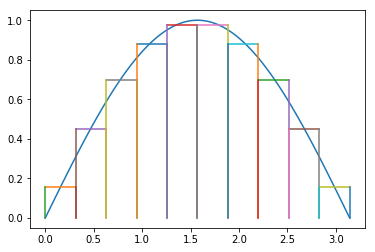

In [6]:
plt.plot(x, y)
for x_section, y_section in history:
    plt.plot(x_section, y_section)
    plt.plot([x_section[0], x_section[0]], [y_section[0], 0])
    plt.plot([x_section[1], x_section[1]], [y_section[0], 0])    

## Или готовое решение

In [7]:
from scipy.integrate import trapz

In [8]:
x = np.linspace(*lims, N)
y = f(x)

In [9]:
I = trapz(y, x, (lims[1] - lims[0]) / N)
print("{0:.3f}".format(I))

1.980


# Метод Монте-Карло

Рассматривается геометрический метод Монте-Карло нахождения площади фигуры.
Краткая суть метода:
* фигура ограничивается прямоугольников $A$ с легко определимой площадью $S_A$;
* в данный прямоугольник случайно "накидываются" точки (из равномерного распределения);
* все точки делятся на два класса: в фигуре и вне её;
* при большом количестве точек $N$, отношения количества точек внутри фигуры $N_\text{internal}$ к $N$ стремится к площади фигуры к $S_A$.

$$
\dfrac{N_\text{internal}}{N} \rightarrow_{N \rightarrow +\infty} \dfrac{S}{S_A}
$$

$$
S \approx \dfrac{N_\text{internal}}{N} S_A 
$$

In [52]:
N = 300
x = np.pi * np.random.random_sample(size=N)
y = np.random.random_sample(size=N)

V = np.pi

In [53]:
(y < f(x)).sum() / N * V

2.0629791758572975

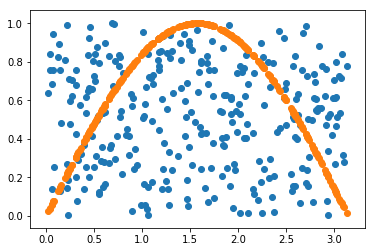

In [54]:
plt.scatter(x, y)
plt.scatter(x, f(x))
plt.savefig("./example.png")

In [38]:
x = np.array([1, 2, 3])

In [43]:
x[x % 2 != 0] = 17

In [44]:
x

array([17,  2, 17])

### Задача 1 (1 балл)
Написать функцию `double_this(arr)`, принимающую на вход массив `arr`, состоящий из чисел, и возвращающую массив, полученный удвоением каждого элемента `arr`.
 
**Подсказка:** Операции с массивами действуют поэлементно.

### Задача 2 (1 балл)
Написать функцию `select_even(arr)`, принимающую на вход массив целых чисел `arr` и возвращающую новый массив, который состоит из всех *чётных* элементов `arr`.
 
**Подсказка:** напомним, что все арифметические операции, а также операции сравнения, действуют на массивы поэлементно.

### Задача 3 (2 балла)
Написать функцию `wipe_even(arr, target_value, in_place)`, принимающую на вход массив целых чисел `arr`, и возвращающую массив, полученный из `arr` путём замены всех чётных элементов на  `target_value`. Если `target_value` не указано, то оно должно считаться равным числу 0. Если указан параметр `in_place` и он равен `True`, то функция должна менять исходный массив, а если не указан или указан в `False`, то сохранять его неизменным.


### Задача 4 (2 балла)
Написать функцию `weighted_sum(weights, grades, normalize)`, возвращающую взвешенную сумму оценок, записанных в массив `grades`, в соответствии с весами, записанными в массив `weights`. Например, для `weights = np.array([0.3, 0.3, 0.4])` и `grades = np.array([7, 9, 8])` функция должна вернуть число $0.3\times 7+0.3\times 9+0.4\times 8=8.0$.

Если параметр `normalize` установлен в `True`, а сумма всех весов отличается от 1, то следует умножить все веса на одно и то же число таким образом, чтобы их сумма была равна 1, в противном случае следует использовать веса «как есть», даже если их сумма отличается от 1. Если функция запущена без указания параметра `normalize`, следует считать, что `normalize = False`.

**Подсказка:** Вам помогут функции `np.dot()` и `np.sum()`. Встроенная функция `sum()` также работает с массивами `numpy`, но гораздо медленнее (проверьте с помощью `%timeit`!) 


### Задача 5 
Написать функцию `mean_by_gender(grades, genders)`, принимающую на вход два массива одинаковой длины: в массиве `grades` записаны оценки некоторых студентов, а в массиве `genders` — их пол в виде строк `male` или `female`. Требуется вернуть словарь, ключами которого будут строки `male` и `female`, а записями — среднее арифметическое оценок студентов соответствующего пола.

Например, если `grades = np.array([5, 4, 3, 5, 2])` и `genders = np.array(["female", "male", "male", "female", "male"])`, функция должна вернуть словарь `{'male': 3.0, 'female': 5.0}`.

**Подсказка.** Для быстрого вычисления среднего есть функция `np.mean()` или соответствующий метод у объектов типа `numpy.array`.


In [55]:
a = [1, 2, 3]

In [56]:
b = []

In [60]:
a * 4

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

In [59]:
[a] * 4

[[1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]]